# SPA assignment 3
By: Ahmad Hamdan

#Task1
## Hough Transform as the line detector


1.   Generate a 2D dataset with a noisy line
2.   Detect the line parameters using Hough Transform
3.   Visualize the results for line detection with Hough Transform in both the rawdata and Hough space



## Image Generation

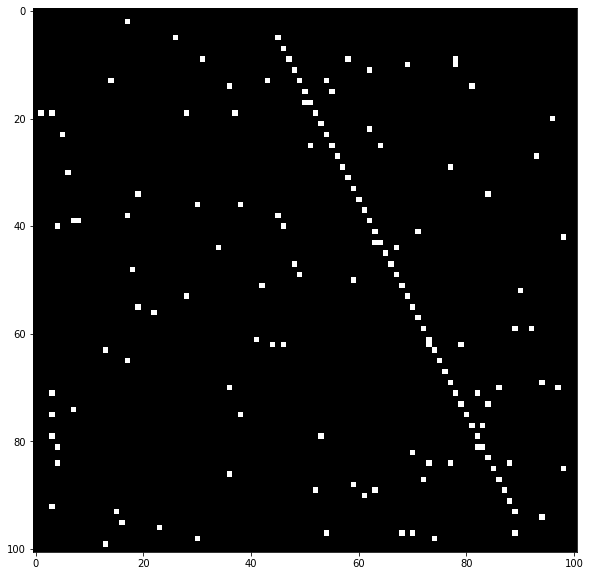

True

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.transform import (hough_line, hough_line_peaks)
from matplotlib import cm
plt.rcParams["figure.figsize"] = (16, 10)


# function to read and resize an image
def read_and_resize(filename: str, grayscale: bool = False, fx: float = 1.0, fy: float = 1.0):
    if grayscale:
      img_result = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
      imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
      # convert to rgb
      img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    # resize
    if fx != 1.0 and fy != 1.0:
      img_result = cv2.resize(img_result, None, fx=fx, fy=fy, interpolation = cv2.INTER_CUBIC)
    return img_result

    
def show_in_row(list_of_images: list, titles: list = None, disable_ticks: bool = False):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()



im=np.zeros((101,101))

a = np.random.randint(1,101,100)  # Random points.
b = np.random.randint(1,101,100)  # Random points.

for i in range(0, 90, 2):  # A line to detect
    a = np.append(a, [i+5])
    b = np.append(b, [0.5*i+45])

b1 = [int(item) for item in b]
# black and white image include line with random noise
im[a,b1] =256


show_in_row([im])

cv2.imwrite('line with noise.jpg', im)

## Line Detection

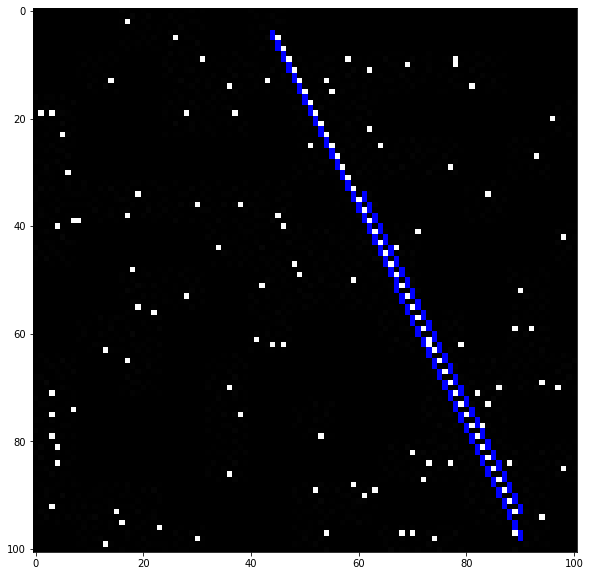

In [88]:
def detectLines(max_slider):
  global img
  global dst
  global gray

  dst = np.copy(img)
  
  th1 = 500 
  th2 = 200
  edges = cv2.Canny(img, th1, th2)
  #show_in_row([edges])

	# Apply probabilistic hough line transform
  lines = cv2.HoughLinesP(edges, 1, np.pi/180.0, 50, minLineLength=10, maxLineGap=100)

  for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(dst, (x1, y1), (x2, y2), (0,0,255), 1) 

img = read_and_resize("line with noise.jpg")

# Create a copy for later usage
dst = np.copy(img)

# Convert image to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Initialize threshold value
initThresh = 500

detectLines(initThresh)
show_in_row([dst])

## Results Visulaization in Hough Space

Source: [stackoverflow](https://stackoverflow.com/questions/57558256using-opencv-hough-tranform-for-line-detection-in-2d-point-cloud)

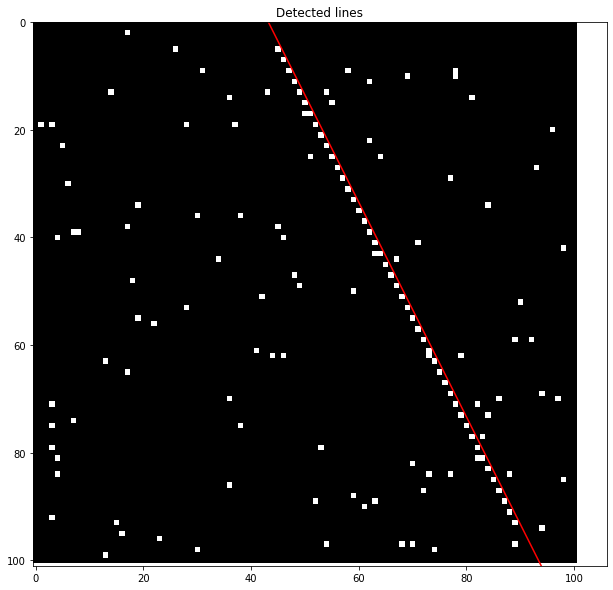

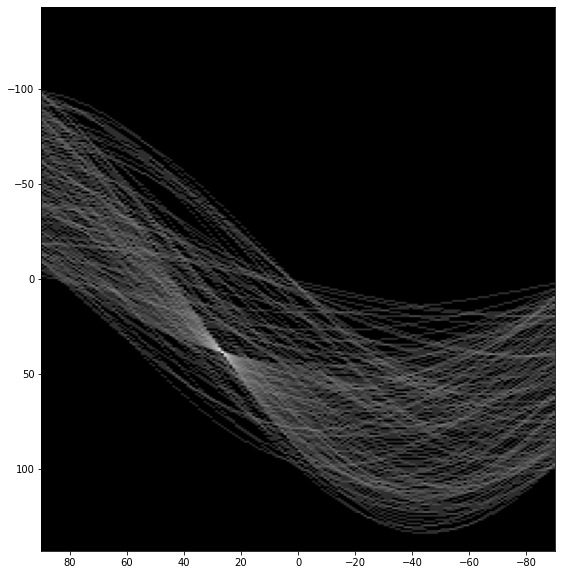

In [89]:
img = im

# Classic straight-line Hough transform
h, theta, d = hough_line(img)


plt.imshow(img, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - img.shape[1] * np.cos(angle)) / np.sin(angle)
    plt.plot((0, img.shape[1]), (y0, y1), '-r')

plt.ylim((img.shape[0], 0))
plt.title('Detected lines')
plt.show()

plt.imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)

# Task2
Detect room contour in 2D LIDAR-based map using Hough Transform as the line detector.

Data was obtained from [stackoverflow](https://stackoverflow.com/questions/59953342/how-to-detect-corner-from-2d-point-cloud-or-image)



## Data Loading

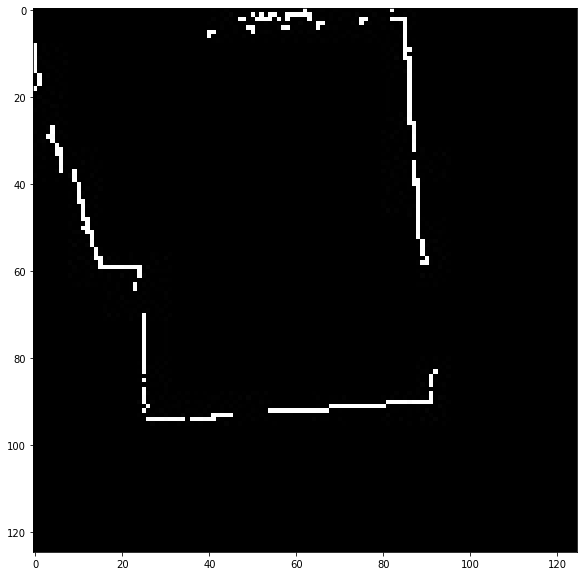

In [90]:
import pandas as pd

Data = pd.read_csv('2D.csv', low_memory=False)

Data.head()
x=Data.iloc[: , 0]
y=Data.iloc[: , -1]
x=np.array((Data.iloc[: , 0]))
y=np.array((Data.iloc[: , -1]))

im=np.zeros((125,125))

x=x-min(x)
y=y-min(y)

a1 = [int(item) for item in 0.01*x]
b1 = [int(item) for item in 0.01*y]

im[a1,b1]=256

cv2.imwrite('2D.jpg', im)

img = read_and_resize("2D.jpg")
show_in_row([img])

## Processing

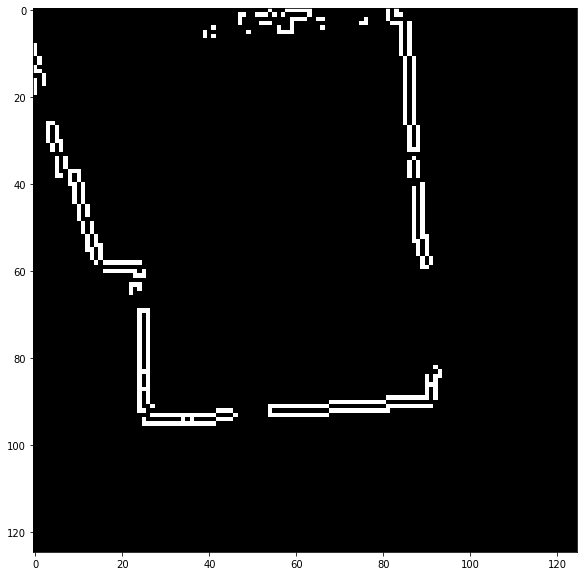

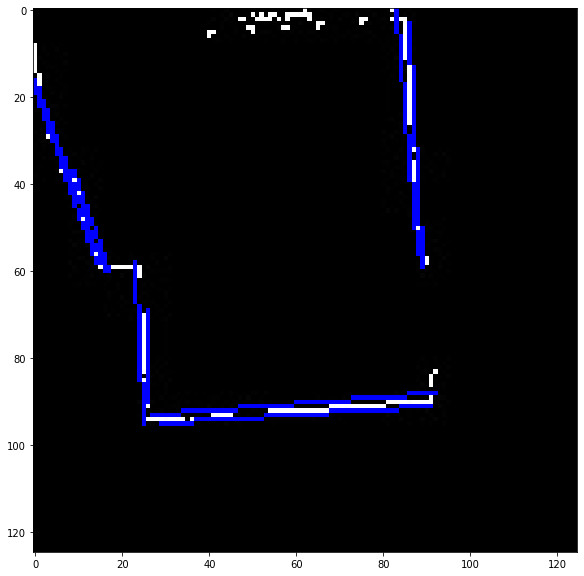

In [91]:
def detectLines(max_slider):
  global img
  global dst
  global gray

  dst = np.copy(img)
  
  th1 = 300 
  th2 = 200
  edges = cv2.Canny(img, th1, th2)
  show_in_row([edges])
	# Apply probabilistic hough line transform
  lines = cv2.HoughLinesP(edges, 1, np.pi/180.0, 20, minLineLength=10, maxLineGap=15)
  # show_in_row([dst])  
	# Draw lines on the detected points
  for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(dst, (x1, y1), (x2, y2), (0,0,255), 1) 


# Create a copy for later usage
dst = np.copy(img)

# Convert image to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Initialize threshold value
initThresh = 500


detectLines(initThresh)
show_in_row([dst])

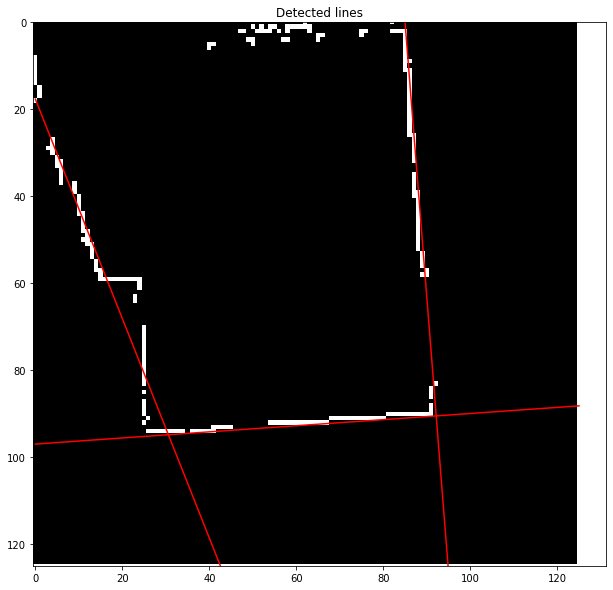

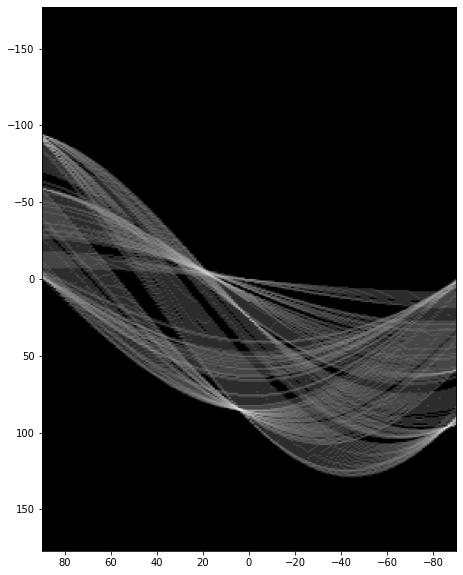

In [92]:
img = im

# Classic straight-line Hough transform
h, theta, d = hough_line(img)


plt.imshow(img, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - img.shape[1] * np.cos(angle)) / np.sin(angle)
    plt.plot((0, img.shape[1]), (y0, y1), '-r')

plt.ylim((img.shape[0], 0))
plt.title('Detected lines')
plt.show()

plt.imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)

All data can be found on [GitHub](https://github.com/ahmad12hamdan99/SPA.git)